<a href="https://colab.research.google.com/github/Nahid-Ahsan/USA-sale-data-analysis-and-visualization-using-pandas/blob/master/Sales_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Data Analysis

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

## Marge the whole dataset into a single csv file.

In [ ]:
files = [file for file in os.listdir('./Sales_Data')]

yearly_sales = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+ file)
    yearly_sales = pd.concat([yearly_sales, df])
yearly_sales.to_csv("Yearly_Sales_Data.csv", index=False)

## Read Full Dataset 

In [ ]:
total_sales = pd.read_csv('Yearly_Sales_Data.csv')
total_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Clean up the data

In [ ]:
nan_df = total_sales[total_sales.isna().any(axis =1)]
nan_df.head()
total_sales = total_sales.dropna(how='all') #Drop the all null value from the dataset
total_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [ ]:
total_sales = total_sales[total_sales['Order Date'].str[0:2]!= 'Or'] #Delete the "Or" from the Order Date Column
total_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [ ]:
total_sales['Quantity Ordered'] = total_sales['Quantity Ordered'].astype('int32')
total_sales['Price Each'] = total_sales['Price Each'].astype('float32')

In [ ]:
total_sales['Month'] = total_sales['Order Date'].str[0:2]
total_sales['Month'] = total_sales['Month'].astype('int32')
total_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [ ]:
total_sales['Sales'] = total_sales['Quantity Ordered'] * total_sales['Price Each']
total_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000


In [ ]:
total_sales['Time'] = total_sales['Order Date'].str[9:]
total_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Time
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000,08:46
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998,22:30
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,14:38
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,14:38
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000,09:27


In [ ]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

total_sales['City'] = total_sales['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
total_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Time,City
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000,08:46,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998,22:30,Boston (MA)
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,14:38,Los Angeles (CA)
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,14:38,Los Angeles (CA)
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000,09:27,Los Angeles (CA)


In [ ]:
total_sales['Order Date'] = pd.to_datetime(total_sales['Order Date'])

In [ ]:
total_sales['Hour'] = total_sales['Order Date'].dt.hour
total_sales['Minute'] = total_sales['Order Date'].dt.minute

In [ ]:
total_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Time,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.900000,08:46,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.989998,22:30,Boston (MA),22,30
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,14:38,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,14:38,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.990000,09:27,Los Angeles (CA),9,27


### Question #1 What was the best month for sales? How much was earned that month

In [ ]:
results = total_sales.groupby('Month').sum()

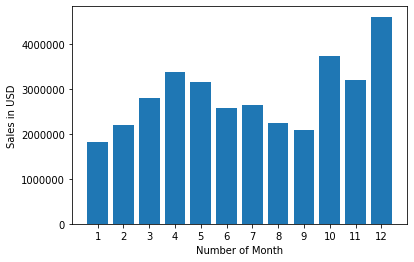

In [ ]:
months = range(1,13)

plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel("Sales in USD")
plt.xlabel("Number of Month")
plt.show()

### Question #2: What city had the highest number of sales?

In [ ]:
results_c = total_sales.groupby('City').sum()
results_c

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
City,,,,,,
Atlanta (GA),16602,2779908.250,104794,2.795499e+06,214264,442932
Austin (TX),11153,1809873.625,69829,1.819582e+06,141946,289060
Boston (MA),22528,3637409.750,141112,3.661642e+06,288225,590442
Dallas (TX),16730,2752627.750,104620,2.767975e+06,214390,435155
Los Angeles (CA),33289,5421435.000,208325,5.452571e+06,427444,866638
New York City (NY),27932,4635371.000,175741,4.664317e+06,357696,733598
Portland (ME),2750,447189.250,17144,4.497583e+05,35211,72856
Portland (OR),11303,1860558.250,70621,1.870732e+06,144421,295533
San Francisco (CA),50239,8211461.500,315520,8.262204e+06,643265,1319477


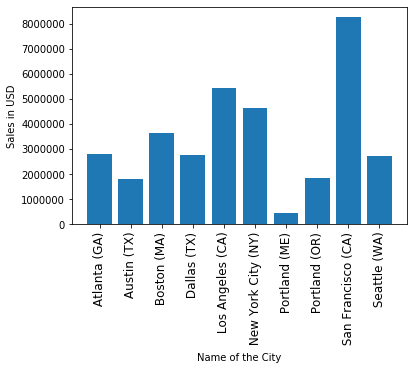

In [ ]:
cities = [city for city,_ in total_sales.groupby('City')]

plt.bar(cities,results_c['Sales'])
plt.xticks(cities,rotation='vertical', size = 12)
plt.ylabel("Sales in USD")
plt.xlabel("Name of the City")
plt.show()

### Question #3: What was the best time for showing advertisements to maximize of customer's buying product?

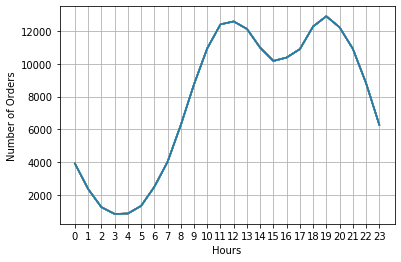

In [ ]:
hour = [hour for hour,_ in total_sales.groupby('Hour')]

plt.plot(hour,total_sales.groupby(['Hour']).count())
plt.xticks(hour)
plt.ylabel("Number of Orders")
plt.xlabel("Hours")
plt.grid()
plt.show()

### Question #4: What products are most often sold together?

In [ ]:
df = total_sales[total_sales['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID','Grouped']].drop_duplicates()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [ ]:
from itertools import combinations
from collections import Counter

In [ ]:
count = Counter()
for row in df['Grouped']:
        row_list= row.split(',')
        count.update(Counter(combinations(row_list,2)))
        
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question #5: What product sold the most? Why do you think it sold the most?

In [ ]:
product_group = total_sales.groupby('Product')
quantity_order = product_group.sum()['Quantity Ordered']
products = [product for product,_ in product_group]

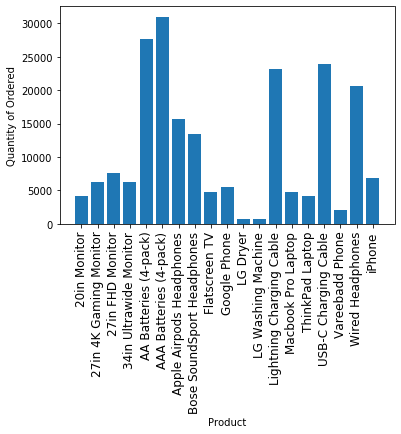

In [ ]:
plt.bar(products,quantity_order)
plt.xticks(products,rotation='vertical', size = 12)
plt.ylabel("Quantity of Ordered")
plt.xlabel("Product")
plt.show()

In [ ]:
prices = total_sales.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.989998
27in 4K Gaming Monitor         389.989990
27in FHD Monitor               149.990005
34in Ultrawide Monitor         379.989990
AA Batteries (4-pack)            3.840000
AAA Batteries (4-pack)           2.990000
Apple Airpods Headphones       150.000000
Bose SoundSport Headphones      99.989998
Flatscreen TV                  300.000000
Google Phone                   600.000000
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        14.950000
Macbook Pro Laptop            1700.000000
ThinkPad Laptop                999.989990
USB-C Charging Cable            11.950000
Vareebadd Phone                400.000000
Wired Headphones                11.990000
iPhone                         700.000000
Name: Price Each, dtype: float32


In [ ]:
products_group = total_sales.groupby('Product')
quantity_ordered = products_group.sum()['Quantity Ordered']

products = [products for products, _ in products_group]

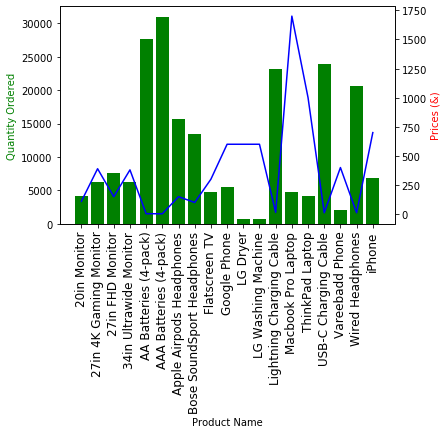

In [ ]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products,prices, 'b-')
ax1.set_xticklabels(products, rotation = 'vertical', size =12)
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Prices (&)', color='r')
plt.show()